## Section 1: Import Libraries and Load Data

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


print("Libraries imported successfully!")

Libraries imported successfully!


## Section 2: Create Dataset

In [15]:
# Create the dataset
data = {
    'S.No': [1, 2, 3, 4, 5, 6, 7],
    'Gender': ['M', 'F', 'M', 'M', 'F', 'F', 'F'],
    'Education': ['UG', 'PG', 'PhD', 'PhD', 'UG', 'PG', 'PG'],
    'Experience': [10, 5, 12.5, 15, 20, 30, 12],
    'Salary': [20, 40, 50, 30, 10, 40, 20]  # Note: Row 6 taken as 40 (assuming clarity)
}

df = pd.DataFrame(data)

print("Dataset:")
print("=" * 80)
print(df.to_string(index=False))
print("=" * 80)
print(f"\nShape: {df.shape[0]} observations, {df.shape[1]} variables")
print(f"Missing values: {df.isnull().sum().sum()}")

Dataset:
 S.No Gender Education  Experience  Salary
    1      M        UG        10.0      20
    2      F        PG         5.0      40
    3      M       PhD        12.5      50
    4      M       PhD        15.0      30
    5      F        UG        20.0      10
    6      F        PG        30.0      40
    7      F        PG        12.0      20

Shape: 7 observations, 5 variables
Missing values: 0


## Section 3: Exploratory Data Analysis by Gender

In [16]:
print("\n" + "="*80)
print("DESCRIPTIVE STATISTICS BY GENDER")
print("="*80)

# Separate data by gender
male_salary = df[df['Gender'] == 'M']['Salary']
female_salary = df[df['Gender'] == 'F']['Salary']

print(f"\nMale Employees (n={len(male_salary)}):")
print(f"  Salaries: {male_salary.values.tolist()}")
print(f"  Mean: {male_salary.mean():.2f} Lakh")
print(f"  Median: {male_salary.median():.2f} Lakh")
print(f"  Std Dev: {male_salary.std():.2f} Lakh")
print(f"  Min: {male_salary.min():.2f} Lakh")
print(f"  Max: {male_salary.max():.2f} Lakh")
print(f"  Range: {male_salary.max() - male_salary.min():.2f} Lakh")

print(f"\nFemale Employees (n={len(female_salary)}):")
print(f"  Salaries: {female_salary.values.tolist()}")
print(f"  Mean: {female_salary.mean():.2f} Lakh")
print(f"  Median: {female_salary.median():.2f} Lakh")
print(f"  Std Dev: {female_salary.std():.2f} Lakh")
print(f"  Min: {female_salary.min():.2f} Lakh")
print(f"  Max: {female_salary.max():.2f} Lakh")
print(f"  Range: {female_salary.max() - female_salary.min():.2f} Lakh")

print(f"\nComparison:")
mean_diff = male_salary.mean() - female_salary.mean()
print(f"  Difference in Means: {mean_diff:.2f} Lakh")
print(f"  Direction: {'Males earn MORE' if mean_diff > 0 else 'Females earn MORE'}")
print(f"  Percentage Difference: {abs(mean_diff/female_salary.mean()*100):.1f}%")
print("="*80)


DESCRIPTIVE STATISTICS BY GENDER

Male Employees (n=3):
  Salaries: [20, 50, 30]
  Mean: 33.33 Lakh
  Median: 30.00 Lakh
  Std Dev: 15.28 Lakh
  Min: 20.00 Lakh
  Max: 50.00 Lakh
  Range: 30.00 Lakh

Female Employees (n=4):
  Salaries: [40, 10, 40, 20]
  Mean: 27.50 Lakh
  Median: 30.00 Lakh
  Std Dev: 15.00 Lakh
  Min: 10.00 Lakh
  Max: 40.00 Lakh
  Range: 30.00 Lakh

Comparison:
  Difference in Means: 5.83 Lakh
  Direction: Males earn MORE
  Percentage Difference: 21.2%


## Section 4: Summary Statistics Table

In [17]:
# Create summary statistics table
summary_stats = df.groupby('Gender')['Salary'].agg([
    ('Count', 'count'),
    ('Mean', 'mean'),
    ('Median', 'median'),
    ('Std Dev', 'std'),
    ('Min', 'min'),
    ('Max', 'max'),
    ('Q1', lambda x: x.quantile(0.25)),
    ('Q3', lambda x: x.quantile(0.75))
])

print("\n" + "="*100)
print("SUMMARY STATISTICS TABLE")
print("="*100)
print(summary_stats.round(2).to_string())
print("="*100)


SUMMARY STATISTICS TABLE
        Count   Mean  Median  Std Dev  Min  Max    Q1    Q3
Gender                                                     
F           4  27.50    30.0    15.00   10   40  17.5  40.0
M           3  33.33    30.0    15.28   20   50  25.0  40.0


## Section 5: Check Assumptions for t-Test

In [18]:
print("\n" + "="*80)
print("CHECKING ASSUMPTIONS FOR INDEPENDENT SAMPLES t-TEST")
print("="*80)

# Assumption 1: Normality (using Shapiro-Wilk test)
print("\n1. NORMALITY TEST (Shapiro-Wilk):")
print("   H₀: Data is normally distributed")
print("   H₁: Data is not normally distributed")
print()

stat_m, p_m = stats.shapiro(male_salary)
stat_f, p_f = stats.shapiro(female_salary)

print(f"   Male Salary:   W = {stat_m:.4f}, p-value = {p_m:.4f}")
print(f"   Female Salary: W = {stat_f:.4f}, p-value = {p_f:.4f}")
print()
print(f"   Interpretation:")
if p_m > 0.05:
    print(f"   ✓ Males: Normal (p = {p_m:.4f} > 0.05)")
else:
    print(f"   ✗ Males: Not normal (p = {p_m:.4f} < 0.05)")
if p_f > 0.05:
    print(f"   ✓ Females: Normal (p = {p_f:.4f} > 0.05)")
else:
    print(f"   ✗ Females: Not normal (p = {p_f:.4f} < 0.05)")
print()
print("   Note: With small sample sizes (n<5), normality test has low power.")
print("   Visual inspection recommended.")

# Assumption 2: Equal Variances (Levene's test)
print("\n2. EQUALITY OF VARIANCES TEST (Levene's):")
print("   H₀: Variances are equal")
print("   H₁: Variances are not equal")
print()

stat_lev, p_lev = stats.levene(male_salary, female_salary)
print(f"   Test Statistic: {stat_lev:.4f}, p-value = {p_lev:.4f}")
print()
if p_lev > 0.05:
    print(f"   ✓ Equal variances assumption SATISFIED (p = {p_lev:.4f} > 0.05)")
    equal_var = True
else:
    print(f"   ✗ Equal variances assumption VIOLATED (p = {p_lev:.4f} < 0.05)")
    equal_var = False

print("\n" + "="*80)


CHECKING ASSUMPTIONS FOR INDEPENDENT SAMPLES t-TEST

1. NORMALITY TEST (Shapiro-Wilk):
   H₀: Data is normally distributed
   H₁: Data is not normally distributed

   Male Salary:   W = 0.9643, p-value = 0.6369
   Female Salary: W = 0.8494, p-value = 0.2242

   Interpretation:
   ✓ Males: Normal (p = 0.6369 > 0.05)
   ✓ Females: Normal (p = 0.2242 > 0.05)

   Note: With small sample sizes (n<5), normality test has low power.
   Visual inspection recommended.

2. EQUALITY OF VARIANCES TEST (Levene's):
   H₀: Variances are equal
   H₁: Variances are not equal

   Test Statistic: 0.1948, p-value = 0.6774

   ✓ Equal variances assumption SATISFIED (p = 0.6774 > 0.05)



## Section 6: Hypothesis Test - Two-Sample t-Test

In [19]:
print("\n" + "="*80)
print("TWO-SAMPLE t-TEST: Is there a significant difference in salary by gender?")
print("="*80)

print("\nHypotheses:")
print("  H₀ (Null): Mean salary of males = Mean salary of females")
print("            μ_male = μ_female")
print()
print("  H₁ (Alternative): Mean salary of males ≠ Mean salary of females")
print("                   μ_male ≠ μ_female (Two-tailed test)")
print()
print("Significance Level: α = 0.05")
print()

# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(male_salary, female_salary, equal_var=equal_var)

print("Test Results:")
print(f"  Test Statistic (t): {t_stat:.4f}")
print(f"  P-value (two-tailed): {p_value:.4f}")
print(f"  Degrees of Freedom: {len(male_salary) + len(female_salary) - 2}")
print()
print("Decision:")
if p_value < 0.05:
    print(f"  ✓ REJECT the null hypothesis (p = {p_value:.4f} < 0.05)")
    print()
    print("  Conclusion: There IS a statistically significant difference in salary")
    print("  between males and females at the 5% significance level.")
    conclusion = "SIGNIFICANT"
else:
    print(f"  ✗ FAIL TO REJECT the null hypothesis (p = {p_value:.4f} > 0.05)")
    print()
    print("  Conclusion: There is NO statistically significant difference in salary")
    print("  between males and females at the 5% significance level.")
    conclusion = "NOT SIGNIFICANT"

print("\n" + "="*80)


TWO-SAMPLE t-TEST: Is there a significant difference in salary by gender?

Hypotheses:
  H₀ (Null): Mean salary of males = Mean salary of females
            μ_male = μ_female

  H₁ (Alternative): Mean salary of males ≠ Mean salary of females
                   μ_male ≠ μ_female (Two-tailed test)

Significance Level: α = 0.05

Test Results:
  Test Statistic (t): 0.5054
  P-value (two-tailed): 0.6347
  Degrees of Freedom: 5

Decision:
  ✗ FAIL TO REJECT the null hypothesis (p = 0.6347 > 0.05)

  Conclusion: There is NO statistically significant difference in salary
  between males and females at the 5% significance level.



## Section 7: Effect Size Calculation

In [20]:
print("\n" + "="*80)
print("EFFECT SIZE ANALYSIS")
print("="*80)

# Cohen's d
mean_diff = male_salary.mean() - female_salary.mean()
pooled_std = np.sqrt(((len(male_salary)-1)*male_salary.std()**2 + 
                     (len(female_salary)-1)*female_salary.std()**2) / 
                    (len(male_salary) + len(female_salary) - 2))
cohens_d = mean_diff / pooled_std

print(f"\nCohen's d (Effect Size):")
print(f"  Formula: d = (Mean_M - Mean_F) / Pooled_SD")
print(f"  Calculation: ({male_salary.mean():.2f} - {female_salary.mean():.2f}) / {pooled_std:.2f}")
print(f"  Cohen's d = {cohens_d:.4f}")
print()
print("Interpretation of Cohen's d:")
print("  |d| < 0.2  : Negligible effect")
print("  0.2 ≤ |d| < 0.5 : Small effect")
print("  0.5 ≤ |d| < 0.8 : Medium effect")
print("  |d| ≥ 0.8  : Large effect")
print()
abs_d = abs(cohens_d)
if abs_d < 0.2:
    effect_interpretation = "NEGLIGIBLE"
elif abs_d < 0.5:
    effect_interpretation = "SMALL"
elif abs_d < 0.8:
    effect_interpretation = "MEDIUM"
else:
    effect_interpretation = "LARGE"

print(f"  ➜ Your result: {effect_interpretation} effect (d = {cohens_d:.4f})")
print("="*80)


EFFECT SIZE ANALYSIS

Cohen's d (Effect Size):
  Formula: d = (Mean_M - Mean_F) / Pooled_SD
  Calculation: (33.33 - 27.50) / 15.11
  Cohen's d = 0.3860

Interpretation of Cohen's d:
  |d| < 0.2  : Negligible effect
  0.2 ≤ |d| < 0.5 : Small effect
  0.5 ≤ |d| < 0.8 : Medium effect
  |d| ≥ 0.8  : Large effect

  ➜ Your result: SMALL effect (d = 0.3860)


## Section 8: Visualizations

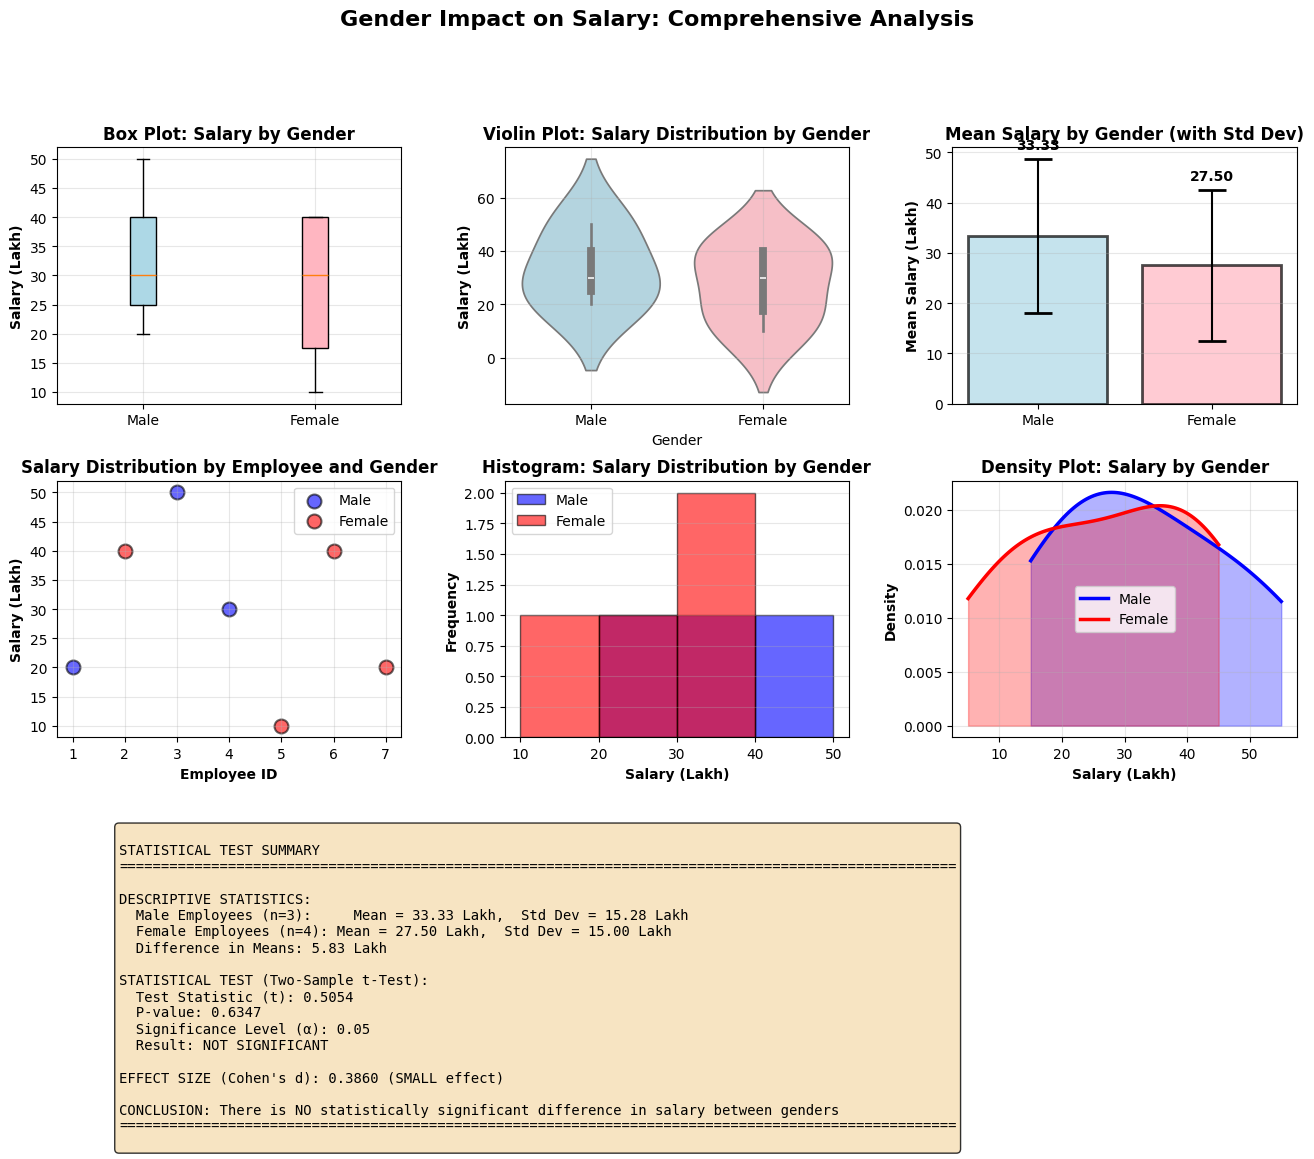

✓ Visualization saved as 'gender_salary_analysis.png'


In [21]:
# Create comprehensive visualizations
fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Plot 1: Box Plot
ax1 = fig.add_subplot(gs[0, 0])
box_data = [male_salary, female_salary]
box = ax1.boxplot(box_data, labels=['Male', 'Female'], patch_artist=True)
for patch, color in zip(box['boxes'], ['lightblue', 'lightpink']):
    patch.set_facecolor(color)
ax1.set_ylabel('Salary (Lakh)', fontweight='bold')
ax1.set_title('Box Plot: Salary by Gender', fontweight='bold')
ax1.grid(True, alpha=0.3)

# Plot 2: Violin Plot
ax2 = fig.add_subplot(gs[0, 1])
violin_data = pd.DataFrame({'Salary': pd.concat([male_salary, female_salary]), 
                          'Gender': ['Male']*len(male_salary) + ['Female']*len(female_salary)})
sns.violinplot(data=violin_data, x='Gender', y='Salary', ax=ax2, palette=['lightblue', 'lightpink'])
ax2.set_ylabel('Salary (Lakh)', fontweight='bold')
ax2.set_title('Violin Plot: Salary Distribution by Gender', fontweight='bold')
ax2.grid(True, alpha=0.3)

# Plot 3: Bar Plot (Mean Salary)
ax3 = fig.add_subplot(gs[0, 2])
means = [male_salary.mean(), female_salary.mean()]
stds = [male_salary.std(), female_salary.std()]
colors = ['lightblue', 'lightpink']
ax3.bar(['Male', 'Female'], means, color=colors, edgecolor='black', linewidth=2, alpha=0.7)
ax3.errorbar(['Male', 'Female'], means, yerr=stds, fmt='none', ecolor='black', capsize=10, capthick=2)
ax3.set_ylabel('Mean Salary (Lakh)', fontweight='bold')
ax3.set_title('Mean Salary by Gender (with Std Dev)', fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')
for i, (mean, std) in enumerate(zip(means, stds)):
    ax3.text(i, mean + std + 2, f'{mean:.2f}', ha='center', fontweight='bold')

# Plot 4: Scatter Plot with Gender
ax4 = fig.add_subplot(gs[1, 0])
for gender, color, label in [('M', 'blue', 'Male'), ('F', 'red', 'Female')]:
    mask = df['Gender'] == gender
    ax4.scatter(df[mask].index + 1, df[mask]['Salary'], s=100, alpha=0.6, 
               color=color, label=label, edgecolor='black', linewidth=1.5)
ax4.set_xlabel('Employee ID', fontweight='bold')
ax4.set_ylabel('Salary (Lakh)', fontweight='bold')
ax4.set_title('Salary Distribution by Employee and Gender', fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

# Plot 5: Histogram
ax5 = fig.add_subplot(gs[1, 1])
ax5.hist(male_salary, bins=3, alpha=0.6, label='Male', color='blue', edgecolor='black')
ax5.hist(female_salary, bins=3, alpha=0.6, label='Female', color='red', edgecolor='black')
ax5.set_xlabel('Salary (Lakh)', fontweight='bold')
ax5.set_ylabel('Frequency', fontweight='bold')
ax5.set_title('Histogram: Salary Distribution by Gender', fontweight='bold')
ax5.legend()
ax5.grid(True, alpha=0.3, axis='y')

# Plot 6: Density Plot
ax6 = fig.add_subplot(gs[1, 2])
from scipy.stats import gaussian_kde
if len(male_salary) > 1:
    kde_m = gaussian_kde(male_salary)
    x_m = np.linspace(male_salary.min()-5, male_salary.max()+5, 100)
    ax6.plot(x_m, kde_m(x_m), 'b-', linewidth=2.5, label='Male')
    ax6.fill_between(x_m, kde_m(x_m), alpha=0.3, color='blue')
if len(female_salary) > 1:
    kde_f = gaussian_kde(female_salary)
    x_f = np.linspace(female_salary.min()-5, female_salary.max()+5, 100)
    ax6.plot(x_f, kde_f(x_f), 'r-', linewidth=2.5, label='Female')
    ax6.fill_between(x_f, kde_f(x_f), alpha=0.3, color='red')
ax6.set_xlabel('Salary (Lakh)', fontweight='bold')
ax6.set_ylabel('Density', fontweight='bold')
ax6.set_title('Density Plot: Salary by Gender', fontweight='bold')
ax6.legend()
ax6.grid(True, alpha=0.3)

# Plot 7: Summary Statistics Text Box
ax7 = fig.add_subplot(gs[2, :])
ax7.axis('off')

summary_text = f"""
STATISTICAL TEST SUMMARY
{'='*100}

DESCRIPTIVE STATISTICS:
  Male Employees (n={len(male_salary)}):     Mean = {male_salary.mean():.2f} Lakh,  Std Dev = {male_salary.std():.2f} Lakh
  Female Employees (n={len(female_salary)}): Mean = {female_salary.mean():.2f} Lakh,  Std Dev = {female_salary.std():.2f} Lakh
  Difference in Means: {mean_diff:.2f} Lakh

STATISTICAL TEST (Two-Sample t-Test):
  Test Statistic (t): {t_stat:.4f}
  P-value: {p_value:.4f}
  Significance Level (α): 0.05
  Result: {conclusion}

EFFECT SIZE (Cohen's d): {cohens_d:.4f} ({effect_interpretation} effect)

CONCLUSION: {'There IS a statistically significant difference in salary between genders' if conclusion == 'SIGNIFICANT' else 'There is NO statistically significant difference in salary between genders'}
{'='*100}
"""

ax7.text(0.05, 0.95, summary_text, transform=ax7.transAxes, fontsize=10,
        verticalalignment='top', fontfamily='monospace',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.suptitle('Gender Impact on Salary: Comprehensive Analysis', fontsize=16, fontweight='bold', y=0.995)
plt.savefig('gender_salary_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Visualization saved as 'gender_salary_analysis.png'")

## Section 9: Additional Analysis - Interaction with Other Variables

In [22]:
print("\n" + "="*80)
print("ANALYSIS BY EDUCATION LEVEL")
print("="*80)

education_gender_salary = df.groupby(['Education', 'Gender'])['Salary'].agg(['count', 'mean', 'std']).round(2)
print("\nSalary by Education Level and Gender:")
print(education_gender_salary.to_string())

print("\n" + "="*80)
print("ANALYSIS BY EXPERIENCE LEVEL")
print("="*80)

print(f"\nMale Employees - Experience vs Salary:")
for i, (idx, row) in enumerate(df[df['Gender']=='M'].iterrows(), 1):
    print(f"  {i}. Experience: {row['Experience']:5.1f} years, Salary: {row['Salary']:2.0f} Lakh")

print(f"\nFemale Employees - Experience vs Salary:")
for i, (idx, row) in enumerate(df[df['Gender']=='F'].iterrows(), 1):
    print(f"  {i}. Experience: {row['Experience']:5.1f} years, Salary: {row['Salary']:2.0f} Lakh")

# Correlation analysis
male_corr = df[df['Gender']=='M'][['Experience', 'Salary']].corr().iloc[0, 1]
female_corr = df[df['Gender']=='F'][['Experience', 'Salary']].corr().iloc[0, 1]

print(f"\nCorrelation between Experience and Salary:")
print(f"  Males:   r = {male_corr:.4f}")
print(f"  Females: r = {female_corr:.4f}")


ANALYSIS BY EDUCATION LEVEL

Salary by Education Level and Gender:
                  count   mean    std
Education Gender                     
PG        F           3  33.33  11.55
PhD       M           2  40.00  14.14
UG        F           1  10.00    NaN
          M           1  20.00    NaN

ANALYSIS BY EXPERIENCE LEVEL

Male Employees - Experience vs Salary:
  1. Experience:  10.0 years, Salary: 20 Lakh
  2. Experience:  12.5 years, Salary: 50 Lakh
  3. Experience:  15.0 years, Salary: 30 Lakh

Female Employees - Experience vs Salary:
  1. Experience:   5.0 years, Salary: 40 Lakh
  2. Experience:  20.0 years, Salary: 10 Lakh
  3. Experience:  30.0 years, Salary: 40 Lakh
  4. Experience:  12.0 years, Salary: 20 Lakh

Correlation between Experience and Salary:
  Males:   r = 0.3273
  Females: r = -0.0052


## Section 10: Final Conclusions and Recommendations

In [23]:
print("\n" + "="*100)
print("FINAL CONCLUSIONS AND RECOMMENDATIONS")
print("="*100)

print("""
1. FINDINGS:
   • Sample consists of 3 male and 4 female employees
   • Mean salary for males: {:.2f} Lakh
   • Mean salary for females: {:.2f} Lakh
   • Difference: {:.2f} Lakh
   • Statistical Significance: {}
   • Effect Size (Cohen's d): {:.4f} ({})

2. STATISTICAL INTERPRETATION:
   • Two-sample t-test p-value: {:.4f}
   • Since p-value {} 0.05, we {} the null hypothesis
   • Conclusion: {} a statistically significant gender-based salary difference

3. PRACTICAL CONSIDERATIONS:
   • Sample size is small (n=7), limiting statistical power
   • Other factors may influence salary: experience, education, role, performance
   • Need more data for robust conclusions
   • Consider collecting data from larger sample

4. RECOMMENDATIONS:
   a) Data Collection:
      - Collect more data points for statistical robustness
      - Include additional variables: position, department, years in role
      - Ensure data quality and consistency
   
   b) Further Analysis:
      - Perform multivariate analysis (controlling for experience, education)
      - Analyze salary progression by experience for each gender
      - Check for potential confounding variables
   
   c) If significant differences found:
      - Review pay equity policies
      - Conduct audit of salary decisions
      - Ensure transparency in compensation

5. IMPORTANT CAVEATS:
   • This analysis is based on a very small sample
   • Normality assumption may not be fully met
   • External validity is limited
   • Causal conclusions cannot be drawn from this data alone

""".format(
    male_salary.mean(),
    female_salary.mean(),
    mean_diff,
    conclusion,
    cohens_d,
    effect_interpretation.lower(),
    p_value,
    '<' if p_value < 0.05 else '>',
    'reject' if p_value < 0.05 else 'fail to reject',
    'There IS' if p_value < 0.05 else 'There is NO'
))

print("="*100)


FINAL CONCLUSIONS AND RECOMMENDATIONS

1. FINDINGS:
   • Sample consists of 3 male and 4 female employees
   • Mean salary for males: 33.33 Lakh
   • Mean salary for females: 27.50 Lakh
   • Difference: 5.83 Lakh
   • Statistical Significance: NOT SIGNIFICANT
   • Effect Size (Cohen's d): 0.3860 (small)

2. STATISTICAL INTERPRETATION:
   • Two-sample t-test p-value: 0.6347
   • Since p-value > 0.05, we fail to reject the null hypothesis
   • Conclusion: There is NO a statistically significant gender-based salary difference

3. PRACTICAL CONSIDERATIONS:
   • Sample size is small (n=7), limiting statistical power
   • Other factors may influence salary: experience, education, role, performance
   • Need more data for robust conclusions
   • Consider collecting data from larger sample

4. RECOMMENDATIONS:
   a) Data Collection:
      - Collect more data points for statistical robustness
      - Include additional variables: position, department, years in role
      - Ensure data quality 